# Regressão Linear com Descida de Gradiente Regularizada 

Este notebook foi criado para facilitar a realização dos experimentos do trabalho. Caso funcione bem, podemos adotar esta ferramenta também em trabalhos futuros.

**Conteúdo do notebook: **

- classe com a implementação da regressão linear com descida de gradiente regularizada;
- main com exemplo de utilização da classe;
- código para gerar os resultados e realizar os experimentos;
- avaliação dos resultados;

**Requisitos para executar este notebook: **
- ter os arquivos do repositório deste notebook na mesma pasta;
- ter numpy instalado (recomendável instalar toda pilha scipy);
- ter sklearn instalado caso queira comparar os resultados;

**Classe da regressão linear com descida de gradiente regularizada:**

A classe está implementada no arquivo regressao_linear_regularizado.py que deve ser mantido no mesmo diretório deste notebook.

**exemplo de uso**

Neste exemplo é utilizado um dataset para regressão disponível no sklearn chamado diabetes.

In [7]:
from regressao_linear_regularizado import RegularizedLinearRegression
import numpy as np
from sklearn import datasets

# CARREGA DATASET
diabetes = datasets.load_diabetes()
nb_instances = diabetes.data.shape[0]

# EMBARALHA
indices = np.arange(nb_instances)

np.random.shuffle(indices)

X = diabetes.data[indices]
Y = diabetes.target[indices]

# SEPARA CONJUNTOS DE TREINO E TESTE (holdout)
TRAIN_SIZE = int(.8 * nb_instances)

X_train = X[:TRAIN_SIZE]
Y_train = Y[:TRAIN_SIZE]

X_test = X[TRAIN_SIZE:]
Y_test = Y[TRAIN_SIZE:]

lr = RegularizedLinearRegression()

epochs = 1000

lr.fit(X_train, Y_train, epochs=1000, learning_rate=0.1, Lambda=0.001)

Y_predict = lr.predict(X_test)

print "loss function: ", lr.loss[-1]
print "MSE: ", lr.mean_squared_error(Y_predict, Y_test)

loss function:  2054.35959254
MSE:  4024.8053902


**Classe para plotar gráficos**

Abaixo está definida a classe utilizada para plotar gŕaficos.

Parâmetros do método plot_curve:
- X -> lista com os pontos do eixo x
- Y -> lista com os pontos do eixo y

In [8]:
import matplotlib.pyplot as plt

class Plot:
    def __init__(self):
        pass
    
    def plot_curve(self, X, Y, xlabel='', ylabel='', color='blue', linewidth=2, title='', grid=False):
        plt.plot(X, Y, color=color, linewidth=linewidth)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.grid(grid)

        plt.show()

**exemplo de execução: Loss x Iteração**

Abaixo está o código para plotar o gráfico da função de custo ao longo de cada iteração.

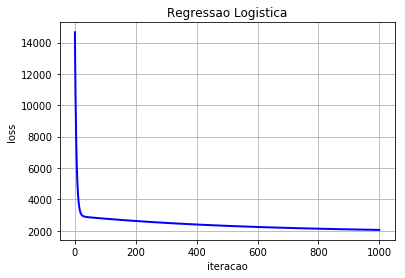

In [9]:
axis_x = range(epochs+1)

axis_y = lr.loss

plot = Plot()
plot.plot_curve(axis_x, axis_y, xlabel='iteracao', ylabel='loss', title='Regressao Logistica', grid=True)

## Utilizando o dataset CCPP

Doravante assume-se que está claro como utilizar as classes que foram implementadas. Para gerar os resultados será utilizado o dataset CCPP (Combined Cycle Power Plant) disponibilizado para o trabalho 1.